# 2.2 Polinomio de interpolación de newton

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/2_Ajuste_funciones/2.2_Polinomio_de_interpolacion_de_Newton.ipynb)

In [2]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales

import numpy as np
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

def LagrangePol(xi, yi):
    # PROCEDIMIENTO
    # Polinomio de Lagrange
    n = len(xi)
    x = sym.Symbol('x')
    polinomio = 0
    divisorL = np.zeros(n, dtype = float)

    for i in range(0,n,1):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j  in range(0,n,1):
            if (j!=i):
                numerador = numerador*(x-xi[j])
                denominador = denominador*(xi[i]-xi[j])
        terminoLi = numerador/denominador
        polinomio = polinomio + terminoLi*yi[i]
        divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand()

    print('Expresión expandida de los polinomios base de lagrange:')
    print(polinomio)
    print('Polinomio de interpolación de Lagrange:')
    print(polisimple)

    # Gráfica
    x0 = np.linspace(min(xi),max(xi),1000)
    px = sym.lambdify(x,polisimple)

    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    fig, ax = plt.subplots(figsize=(15,6))
    plt.plot(xi, yi,'o', label = 'datos')
    plt.plot(x0, px(x0), label = 'polinomio')
    ax.tick_params(labelsize=14, axis='x')
    ax.tick_params(labelsize=14, axis='y')
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.title(f'Polinomio de interpolación de Lagrange', fontsize=18)
    plt.legend(fontsize=14)
    plt.show()

In [1]:

def get_diff_table(X,Y):
    """
    Obtenga la tabla de interpolación
    """
    n=len(X)
    A=np.zeros([n,n])
    
    for i in range(0,n):
        A[i][0] = Y[i]
    
    for j in range(1,n):
        for i in range(j,n):
            A[i][j] = (A[i][j-1] - A[i-1][j-1])/(X[i]-X[i-j])
    
    return A
    
def newton_interpolation(X,Y,x):
    
    """
        Calcular la interpolación en x puntos
    """
    sum=Y[0]
    temp=np.zeros((len(X),len(X)))
        # Asignar la primera línea
    for i in range(0,len(X)):
        temp[i,0]=Y[i]
    temp_sum=1.0
    for i in range(1,len(X)):
        #x polinomio
        temp_sum=temp_sum*(x-X[i-1])
        # Calcular diferencia de medias
        for j in range(i,len(X)):
            temp[j,i]=(temp[j,i-1]-temp[j-1,i-1])/(X[j]-X[j-i])
        sum+=temp_sum*temp[i,i] 
    return sum

def ejecutar_newton_interpolation(X,Y):
    
    print("Tabla Algoritmo de interpolación de Newton implementado")
    A = get_diff_table(X,Y)
    df = pd.DataFrame(A)
    print(df)
    
    xs=np.linspace(np.min(X),np.max(X),1000,endpoint=True)
    ys=[]
    for x in xs:
        ys.append(newton_interpolation(X,Y,x))
    
    print("Grafica Algoritmo de interpolación de Newton implementado")
    plt.figure(figsize=(15,10))    
    plt.title("newton_interpolation")
    plt.plot (X, Y, 's', label = "valores originales") #El punto azul representa el valor original
    plt.plot (xs, ys, 'r', label = 'valores de interpolación') # Curva de interpolación
    plt.xlabel('x')  
    plt.ylabel('y')  
    plt.legend (loc = 4) # Especifique la posición de la leyenda
    


## Introducción

En la sección anterior, exploramos el método de interpolación de Lagrange para aproximar una función. Si bien es un método intuitivo y fácilmente comprensible, no siempre es la forma más práctica para el cálculo debido a su complejidad computacional.

En esta sección, presentamos el método de interpolación de Newton utilizando las *diferencias divididas* de Newton. Este método ofrece una forma más simple y manejable de calcular el polinomio interpolante. Veremos cómo calcularlo eficientemente y cómo utilizarlo para aproximar valores de la función en puntos no incluidos en la tabla de datos original.

## Diferencias divididas

El método de interpolación de Newton utiliza las *diferencias divididas* para aproximar una función en un conjunto discreto de puntos. Este método implica construir un polinomio de interpolación de grado creciente a partir de un conjunto de puntos dados. Este proceso comienza con la construcción de un polinomio de grado cero que pasa por uno de los puntos de la lista. Luego, se utiliza ese polinomio como base para construir un polinomio de grado uno que pasa por otro punto en la lista, y así sucesivamente hasta que se complete un polinomio de grado $n-1$ o menor que pase por todos los puntos en la lista.

### Cálculo de los polinomios
Supongamos que tenemos $n+1$ puntos $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$ y queremos encontrar un polinomio p(x) de grado $n-1$ o menor que pase exactamente por esos $n+1$ puntos. Para encontrar este polinomio, construimos polinomios de interpolación de grado creciente, comenzando con un polinomio de grado cero que pasa por el primer punto de la lista. A continuación, se construye un polinomio de grado uno que pasa por los dos primeros puntos de la lista, y así sucesivamente, hasta que se haya construido el polinomio de grado $n-1$ que pasa por todos los puntos de la lista.

**- $p_0(x)$**: El polinomio que pasa por el primer punto $(x_0, y_0)$ se puede escribir como:
$$p_0(x) = a_0$$
donde $a_0 = y_0$. así, encontramos un polinomio (en este caso, una recta constante, que pasa por $(x_0, y_0)$.

**- $p_1(x)$**: El polinomio que pasa por los dos primeros puntos $(x_0, y_0)$ y $(x_1, y_1)$ es una recta que se puede escribir como:
$$p_0(x) = a_0 + a_1(x - x_0)$$
donde $a_0 = y_0$ y $a_1$ es la pendiente de la recta que pasa por los dos puntos: $a_1 = \dfrac{y_2 - y_1}{x_2 - x_1}$.

**- $p_i(x)$**: El i-ésimo polinomio que pasa por los dos primeros $i$ puntos $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_i, y_i)$ se puede escribir como:
$$p_0(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + ... +  a_n(x - x_0)(x - x_1)...(x - x_{n-1})$$

Para construir el polinomio de interpolación de grado $i$, necesitamos determinar $i+1$ constantes $a_0, a_1, ..., a_i$. Estas constantes se pueden calcular utilizando las diferencias divididas de Newton. La primera diferencia dividida $f[x_i]$ es simplemente la $i$-ésima coordenada $y_i$ de los puntos dados. Las constantes $a_k$ se calculan utilizando la diferencia dividida de orden $k$ $f[x_0, x_1, ..., x_k]$. Este método es recursivo, ya que cada diferencia dividida de orden $k$ se calcula utilizando las diferencias divididas de orden $k-1$ correspondientes.

**Diferencia orden-0** $\Delta^0$ respecto a $x_i$: $f[x_i] = y_i$
**Diferencia orden-1** $\Delta^1$ respecto a $x_i$ y $x_{i+1}$: $f[x_i, x_{i+1}] = \dfrac{f[x_{i+1}] - f[x_i]}{x_{i+1} - x_i}$
**Diferencia orden-2** $\Delta^2$ respecto a $x_i$, $x_{i+1}$ y $x_{i+2}$: $f[x_i, x_{i+1}, x_{i+2}] = \dfrac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i}$
**Diferencia orden-3** $\Delta^3$ respecto a $x_i$, $x_{i+1}$, $x_{i+2}$ y $x_{i+3}$: $f[x_i, x_{i+1}, x_{i+2}, x_{i+3}] = \dfrac{f[x_{i+1}, x_{i+2}, x_{i+3}] - f[x_{i}, x_{i+1}, x_{i+2}]}{x_{i+3} - x_i}$
**Diferencia orden-k** $\Delta^k$ respecto a $x_i$, $x_{i+1}$, $x_{i+2}$, $x_{i+3}$ y $x_{i+k}$: $f[x_i, x_{i+1}, x_{i+2}, x_{i+3}, ..., x_{i+k}] = \dfrac{f[ x_{i+1}, x_{i+2}, x_{i+3}, ..., x_{i+k}] - f[x_i, x_{i+1}, x_{i+2}, x_{i+3}, ..., x_{i+k-1}]}{x_{i+k} - x_i}$

El proceso termina con la última **diferencia dividida orden-n** $\Delta^n$ respecto a $x_0$, $x_1$, $x_2$, ..., $x_n$: $f[x_0, x_{1}, x_{2}, x_{3}, ..., x_{n}] = \dfrac{f[x_{1}, x_{2}, x_{3}, ..., x_{n}] - f[x_0, x_{1}, x_{2}, x_{3}, ..., x_{n-1}]}{x_{n} - x_0}$

Sabemos que $a_0 = f[x_0] = y_0$ y $a_1 = f[x_0, x_1] = \dfrac{f[x_1] - f[x_0]}{x_{1} - x_0} = \dfrac{y_2 - y_1}{x_2 - x_1}$. Como se puede esperar la forma recursiva de encontrar las contantes es $a_k = f[x_0, x_1, x_2, ... x_k]$ para $k = 0, 1, 2, ... , n$, el cual corresponde a una diferencia dividida de orden $k$ que necesita de las diferencias divididas de ordendes inferiores.

### Primeras diferencias divididas
La generación de las diferencias divididas y de $a_k$ se describe en la siguiente tabla de recurrencia

| $x$   | $f(x)$ $\Delta^0$  | diferencia orden-1 $\Delta^1$ | diferencia orden-2 $\Delta^2$ | diferencia orden-3 $\Delta^3$ | diferencia orden-4 $\Delta^4$       |
|-------|----------------------|-------------------------------|-------------------------------|-------------------------------|-------------------------------------|
| $x_0$ | $a_0 = f(x_0) = y_0$ |                               |                               |                               |                                     |
| $x_1$ | $f(x_1)$             | $a_1 = f[x_1, x_0]$           |                               |                               |                                     |
| $x_2$ | $f(x_2)$             | $f[x_2, x_1]$                 | $a_2 = f[x_2, x_1, x_0]$      |                               |                                     |
| $x_3$ | $f(x_3)$             | $f[x_3, x_2]$                 | $f[x_3, x_2, x_1]$            | $a_3 = f[x_3, x_2, x_1, x_0]$ |                                     |
| $x_4$ | $f(x_4)$             | $f[x_4, x_3]$                 | $f[x_4, x_3, x_2]$            | $f[x_4, x_3, x_2, x_1]$       | $ a_4 = f[x_4, x_3, x_2, x_1, x_0]$ |

Una ventaja significativa del método de interpolación de Newton es que permite agregar nuevos puntos a la lista de interpolación fácilmente sin tener que recalcular todos los polinomios anteriores. Para agregar un nuevo punto $(x_{n+1}, y_{n+1})$, solo es necesario calcular las diferencias divididas adicionales necesarias y usarlas para construir el nuevo polinomio de interpolación.

## Ejemplo práctico 1

**Interpolar un conjunto de datos mediante el polinomio de interpolación de lagrange**

Encontrar el polinomio de interpolación de Lagrange que ajusta los datos $(-2, 0)$, $(0, −1)$, $(1, 1)$, $(2, 2)$ y $(4, 0)$.

### Solución:

Organicemos los puntos en una tabla para ir completando con las diferencias dividias

| $i$ | $x_1$ | $y_i = \Delta^0$ | $\Delta^1$ | $\Delta^2$ | $\Delta^3$ | $\Delta^4$|
|-----|-------|------------------|-------------|-------------|-------------|--------------|
| $0$ | $-2$  | $0$              |             |             |             |              |
| $1$ | $0$   | $-1$             |            |             |             |              |
| $2$ | $1$   | $1$              |            |           |             |              |
| $3$ | $2$   | $2$              |           |         |          |              |
| $4$ | $4$   | $0$              |         |          |          |         |

Ahora calculamos las diferencias divididas orden-1:

| $i$ | $x_1$ | $y_i = \Delta^0$ | $\Delta^1$ | $\Delta^2$ | $\Delta^3$ | $\Delta^4$|
|-----|-------|------------------|-------------|-------------|-------------|--------------|
| $0$ | $-2$  | $a_0 = 0$        |             |             |             |              |
| $1$ | $0$   | $-1$             |  $f[x_1, x_0]$          |             |             |              |
| $2$ | $1$   | $1$              |  $f[x_2, x_1]$          |           |             |              |
| $3$ | $2$   | $2$              |  $f[x_3, x_2]$          |         |          |              |
| $4$ | $4$   | $0$              |  $f[x_4, x_3]$          |          |          |         |


$f[x_1, x_0] = \dfrac{-1 - 0}{0 - (-2)} = -\dfrac{1}{2}$,

$f[x_2, x_1] = \dfrac{1 - (-1)}{1 - 0} = 2$,

$f[x_3, x_2] = \dfrac{2 - 1}{2 - 1} = 1$,

$f[x_4, x_3] = \dfrac{0 - 2}{4 - 2} = -1$

| $i$ | $x$  | $\Delta^0$ | $\Delta^1$            | $\Delta^2$ | $\Delta^3$ | $\Delta^4$|
|-----|------|------------|-----------------------|------------|-------------|------------|
| $0$ | $-2$ | $a_0 = 0$  |                       |            |             |            |
| $1$ | $0$  | $-1$       | $a_1 = -\dfrac{1}{2}$ |            |             |            |
| $2$ | $1$  | $1$        | $2$                   |          |             |            |
| $3$ | $2$  | $2$        | $1$                   |         |         |            |
| $4$ | $4$  | $0$        | $-1$                  |         |          |        |

Continuando con el proceso, ahora calculamos las diferencias orden-2:

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$         | $\Delta^3$ | $\Delta^4$|
|-----|-----|-------------|-----------------|--------------------|-------------|------------|
| 0   | -2  | $a_0 = 0$           |                 |                    |             |            |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                    |             |            |
| 2   | 1 | 1           | 2               | $f[x_2, x_1, x_0]$ |             |            |
| 3   | 2 | 2           | 1               | $f[x_3, x_2, x_1]$ |         |            |
| 4   | 4 | 0           | -1              | $f[x_4, x_3, x_2]$ |          |        |

$f[x_2, x_1, x_0] = \dfrac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0} = \dfrac{2 - \left(-\dfrac{1}{2} \right)}{1 - (-2)} = \dfrac{5}{6}$,

$f[x_3, x_2, x_1]= \dfrac{f[x_2, x_3] - f[x_1, x_2]}{x_3 - x_1} = \dfrac{1 - 2}{2 - 0} = -\dfrac{1}{2}$,

$f[x_4, x_3, x_2] = \dfrac{f[x_3, x_4] - f[x_2, x_3]}{x_4 - x_2} = \dfrac{-1 -1}{4-1} = -\dfrac{2}{3}$,

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$           | $\Delta^3$ | $\Delta^4$|
|-----|-----|-------------|-----------------|----------------------|-------------|------------|
| 0   | -2  | $a_0 = 0$           |                 |                      |             |            |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                      |             |            |
| 2   | 1 | 1           | 2               | $a_2 = \dfrac{5}{6}$ |             |            |
| 3   | 2 | 2           | 1               | $-\dfrac{1}{2}$      |         |            |
| 4   | 4 | 0           | -1              | $-\dfrac{2}{3}$      |          |        |

Continuando con el proceso, ahora calculamos las diferencias orden-3:

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$           | $\Delta^3$               | $\Delta^4$|
|-----|-----|-------------|-----------------|----------------------|--------------------------|------------|
| 0   | -2  | $a_0 = 0$           |                 |                      |                          |            |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                      |                          |            |
| 2   | 1 | 1           | 2               | $a_2 = \dfrac{5}{6}$ |                          |            |
| 3   | 2 | 2           | 1               | $-\dfrac{1}{2}$      | $f[x_3, x_2, x_1, x_0]$  |            |
| 4   | 4 | 0           | -1              | $-\dfrac{2}{3}$      | $f[x_4, x_3, x_2, x_1]$  |        |

$f[x_3, x_2, x_1, x_0] = \dfrac{f[x_1, x_2, x_3] - f[x_0, x_1, x_2]}{x_3 - x_0} = \dfrac{-\dfrac{1}{2} - \dfrac{5}{6}}{2 - (-2)} = -\dfrac{1}{3}$,

$f[x_4, x_3 x_2, x_1] = \dfrac{f[x_2, x_3, x_4] - f[x_1, x_2, x_3]}{x_4 - x_1} = \dfrac{-\dfrac{2}{3} - \left(-\dfrac{1}{2} \right)}{4 - 0} = -\dfrac{1}{24}$,

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$           | $\Delta^3$              | $\Delta^4$|
|-----|-----|-------------|-----------------|----------------------|-------------------------|------------|
| 0   | -2  | $a_0 = 0$           |                 |                      |                         |            |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                      |                         |            |
| 2   | 1 | 1           | 2               | $a_2 = \dfrac{5}{6}$ |                         |            |
| 3   | 2 | 2           | 1               | $-\dfrac{1}{2}$      | $a_3 = -\dfrac{1}{3}$                |            |
| 4   | 4 | 0           | -1              | $-\dfrac{2}{3}$      | $-\dfrac{1}{24}$ |        |

El proceso finaliza encontrando la diferencia orden-4

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$           | $\Delta^3$              | $\Delta^4$                   |
|-----|-----|-------------|-----------------|----------------------|-------------------------|------------------------------|
| 0   | -2  | $a_0 = 0$           |                 |                      |                         |                              |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                      |                         |                              |
| 2   | 1 | 1           | 2               | $a_2 = \dfrac{5}{6}$ |                         |                              |
| 3   | 2 | 2           | 1               | $-\dfrac{1}{2}$      | $a_3 = -\dfrac{1}{3}$                |                              |
| 4   | 4 | 0           | -1              | $-\dfrac{2}{3}$      | $-\dfrac{1}{24}$ | $f[x_4, x_3, x_2, x_1, x_0]$ |

$f[x_4, x_3, x_2, x_1, x_0] = \dfrac{f[x_1, x_2, x_3, x_4] - f[x_0, x_1, x_2, x_3]}{x_4 - x_0} = \dfrac{-\dfrac{1}{24} - \left(-\dfrac{1}{3} \right)}{4 - (-2)} = \dfrac{7}{144}$,

| $i$ | $x$ | $\Delta^0$ | $\Delta^1$      | $\Delta^2$           | $\Delta^3$              | $\Delta^4$ |
|-----|-----|-------------|-----------------|----------------------|-------------------------|------------|
| 0   | -2  | $a_0 = 0$           |                 |                      |                         |            |
| 1   | 0 | -1          | $a_1 = -\dfrac{1}{2}$ |                      |                         |            |
| 2   | 1 | 1           | 2               | $a_2 = \dfrac{5}{6}$ |                         |            |
| 3   | 2 | 2           | 1               | $-\dfrac{1}{2}$      | $a_3 = -\dfrac{1}{3}$                |            |
| 4   | 4 | 0           | -1              | $-\dfrac{2}{3}$      | $-\dfrac{1}{24}$ | $a_4 = \dfrac{7}{144}$   |

Una vez calculadas todas las diferencias divididas, se procede a escribir el polinomio de interpolación:

$$p(x) = a_0 + a_1(x − x_0) + a_2(x − x_0)(x − x_1) + a_3(x − x_0)(x − x_1)(x − x_2) + a_4(x − x_0)(x − x_1)(x − x_2)(x - x_3)$$

Notar que los valores $a_0=f[x_0], a_1=f[x_0, x_1], a_2=f[x_0, x_1, x_2], a_3=f[x_0, x_1, x_2, x_3], a_4=f[x_4, x_3, x_2, x_1, x_0]$ corresponden a la diagonal de la tabla de diferencias divividas. Por lo tanto, al reemplazar los correspondientes valores de la diagonal, se concluye que
$$p(x) = -\dfrac{1}{2}(x − (-2)) + \dfrac{5}{6}(x − (-2))(x - 0) -\dfrac{1}{3}(x − (-2))(x − 0)(x − 1) + \dfrac{7}{144}(x − (-2))(x − 0)(x − 1)(x - 2)$$
$$p(x) = -\dfrac{1}{2}(x + 2) + \dfrac{5}{6}(x + 2)x -\dfrac{1}{3}(x + 2)(x − 1)x + \dfrac{7}{144}(x + 2)(x − 1)(x - 2)x$$

Simplificando y ordenando términos, se obtiene un polinomio de grado 4:

$$ p(x) = \frac{1}{144} \left(7 x^4-55 x^3+44 x^2+292 x-144\right) $$

**Observación**: Este ejercicio fue el mismo que desarrollamos en la sección del polinomio de interpolación de Lagrange, es importante señalar que el polinomio es el mismo, aunqie se halle de maneras distintas y cunado está sin simplifcar parece diferente. al simplificar ambas respuestas se llegó al mismo polinomio.


\frac{-\frac{1}{2}-\frac{5}{6}}{2--2}


$f[x_4, x_3, x_2] = \dfrac{f[x_3, x_4] - f[x_2, x_3]}{x_4 - x_2} = \dfrac{-1 -1}{4-1} = -\dfrac{2}{3}$,

__Solución:__ al organizar los puntos en una tabla se obtiene:

Ahora, se deben calcular las diferencias divididas de orden $0, 1, 2$ y  $3$. Las diferencias de orden cero $f[x_i]$, corresponden a la columna $y_i$, de donde:



| $i$ | $x_i$ | $\Delta^0$ |
|---|-----|---|
|  0|    -1|  2|
|   1|     0|   -1|
|   2|     1|   1|
|   3|     2|   -2|



Para determinar las diferencias de orden uno, $Δ_1$, se debe calcular $f[x_{i−1}, x_i] = \frac{f[x_i ]− f[x_{i−1}]} {x_i− x_{i−1}}$
para $i = 1, 2, 3$:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|   1|     0|   -1|$f[x_0,x_1]$|
|   2|     1|   1|$f[x_1,x_2]$|
|   3|     2|   -2|$f[x_2,x_3]$|


Calculando cada $f[x_{i−1}, x_i]$ y recordando que $f[x_j]$ corresponde a $y_j$ , se obtiene:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|   1|     0|   -1|$f[x_0,x_1] = \frac{y_1-y_0}{x_1-x_0}$|
|   2|     1|   1|$f[x_1,x_2] = \frac{y_2-y_1}{x_2-x_1} $|
|   3|     2|   -2|$f[x_2,x_3] = \frac{y_3-y_2}{x_3-x_2}$|

Tomando los valores correspondientes, se concluye:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ |
|---|-----|---|---|
|  0|    -1|  2|
|  1|     0| -1|$\frac{-1-2}{0-(-1)} = -3$|
|  2|     1|  1|$\frac{1-(-1)}{1-0} = -2$|
|  3|     2| -2|$\frac{-2-1}{2-1} = -3$|

Ahora, se agrega una columna con las diferencias de orden dos, $Δ_2$, que contiene los valores $f[x_{i−2}, x_{i−1}, x_i]$ para $i = 2, 3$.


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$f[x_0, x_1, x_2]$|
|  3|     2| -2| -3|$f[x_1, x_2, x_3]$|

Como $f[x_{i−2}, x_{i−1}, x_i] = \frac {f[x_{i−1} ,x_i ]− f[x_{i−2},x_{i−1}]} {x_i−x_{i−2}}$:


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$f[x_0, x_1, x_2] = \frac{f[x_1, x_2]-f[x_0, x_1]}{x_2-x_0}$|
|  3|     2| -2| -3|$f[x_1, x_2, x_3] = \frac{f[x_2, x_3]-f[x_1, x_2]}{x_3-x_1}$|

Dado que $f[x_{i−1}, x_i]$ está ubicado en la columna $Δ^1$, entonces:

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$\frac{f[x_1, x_2]-f[x_0, x_1]}{x_2-x_0} =  \frac{2-(-3)}{1-(-1)} = \frac{5}{2}$|
|  3|     2| -2| -3|$\frac{f[x_2, x_3]-f[x_1, x_2]}{x_3-x_1} =  \frac{-3-2}{2-0} = \frac{-5}{2}$|


Por último, se construye la columna $Δ^3$, que contiene a $f[x_0, x_1, x_2, x_3] = \frac {f[x_1,x_2,x_3]− f[x_0,x_1 ,x_2]} {x_3−x_0} $

| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|
|  3|     2| -2| -3|$\frac{-5}{2} f[x_0, x_1, x_2, x_3] = \frac{f[x_1, x_2, x_3]-f[x_0, x_1, x_2]}{x_3 - x_0}$|


Como $f[x_1, x_2, x_3]$ y $f[x_0, x_1, x_2]$ están en la columna $Δ^2$, se determina que


| $i$ | $x_i$ | $\Delta^0$ | $\Delta^1$ | $\Delta^2$ |
|---|-----|---|---|---|
|  0|    -1|  2|
|  1|     0| -1| -3|
|  2|     1|  1|  2|$\frac{5}{2} $|
|  3|     2| -2| -3|$\frac{-5}{2} \frac{f[x_1, x_2, x_3]-f[x_0, x_1, x_2]}{x_3 - x_0} = \frac{-5}{3}$|




Una vez calculadas todas las diferencias divididas, se procede a escribir el polinomio de interpolación:

$P(x) = f[x_0]+f[x_0, x_1](x−x_0)+f[x_0, x_1, x_2](x−x_0)(x−x_1)+f [x_0, x_1, x_2, x_3](x−x_0)(x−x_1)(x−x_2)$.

Notar que los valores $f[x_0], f[x_0, x_1], f[x_0, x_1, x_2], f[x_0, x_1, x_2, x_3]$ corresponden a la diagonal de la tabla de diferencias divividas. Por lo tanto, al reemplazar los correspondientes valores de la diagonal, se concluye que $ P(x) = 2 − 3(x + 1) + \frac {5}{2} (x + 1)x − \frac {5}{3}(x + 1)x(x − 1)$.

Tabla Algoritmo de interpolación de Newton implementado
     0    1         2         3         4
0  0.0  0.0  0.000000  0.000000  0.000000
1 -1.0 -0.5  0.000000  0.000000  0.000000
2  1.0  2.0  0.833333  0.000000  0.000000
3  2.0  1.0 -0.500000 -0.333333  0.000000
4  0.0 -1.0 -0.666667 -0.041667  0.048611
Grafica Algoritmo de interpolación de Newton implementado


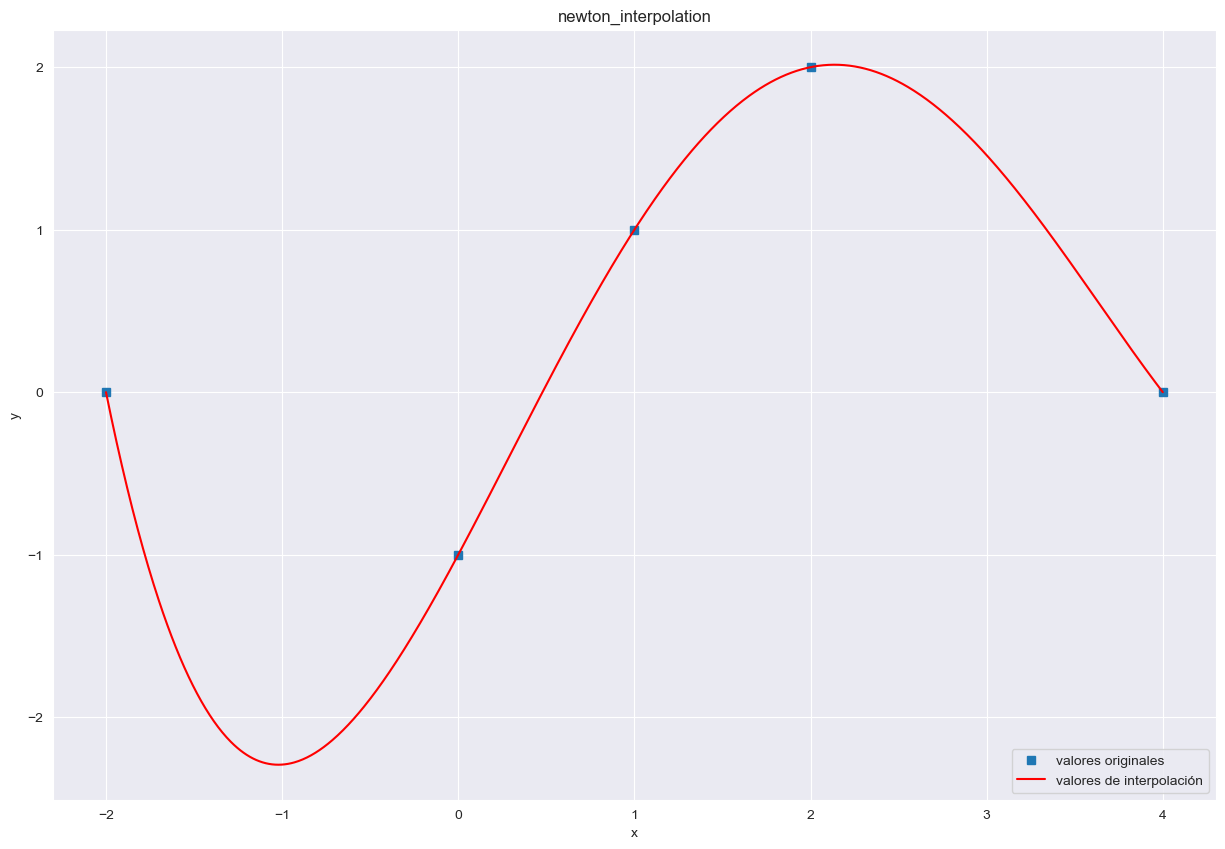

In [4]:
# Datos de la tabla
x = [-2, 0, 1, 2, 4]
y = [0, -1, 1, 2, 0]
ejecutar_newton_interpolation(x,y)